In [48]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

dataSet = pd.read_csv('../base/Processed_laptop.csv')
display(dataSet.describe())
gainRation = pd.read_csv('../base/Laptop_gr.csv')
display(gainRation)

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Brand
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.005000,15.500000,584.576000,3.055000,2.959000,4.954000,1.956000
std,1.431441,10.988665,313.438517,1.379086,1.423849,3.790812,1.404292
min,1.000000,4.000000,256.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,8.000000,256.000000,2.000000,2.000000,1.000000,1.000000
50%,3.000000,16.000000,512.000000,3.000000,3.000000,4.000000,2.000000
75%,4.000000,32.000000,1000.000000,4.000000,4.000000,10.000000,3.000000
max,5.000000,32.000000,1000.000000,5.000000,5.000000,10.000000,4.000000


,Unnamed: 0,Storage_Capacity,RAM_Size,Processor_Speed,Brand,Screen_Size,Weight
0,0,1.000000,0.019459,0.009317,0.007553,0.007505,0.005816
1,1,167891.703087,271.094406,12.119902,3.917002,3.748889,1.970773


In [49]:
from sklearn.model_selection import train_test_split

x = dataSet.drop(['Price'], axis=1)
y = dataSet['Price']
display(y.describe())
display(x.describe())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)
# print(x_train)
# print(x_test)
# print(y_train)
# print(y_test)

count    1000.000000
mean        4.954000
std         3.790812
min         1.000000
25%         1.000000
50%         4.000000
75%        10.000000
max        10.000000
Name: Price, dtype: float64

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Brand
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.005000,15.500000,584.576000,3.055000,2.959000,1.956000
std,1.431441,10.988665,313.438517,1.379086,1.423849,1.404292
min,1.000000,4.000000,256.000000,1.000000,1.000000,0.000000
25%,2.000000,8.000000,256.000000,2.000000,2.000000,1.000000
50%,3.000000,16.000000,512.000000,3.000000,3.000000,2.000000
75%,4.000000,32.000000,1000.000000,4.000000,4.000000,3.000000
max,5.000000,32.000000,1000.000000,5.000000,5.000000,4.000000


Mean Squared Error (MSE): 0.26639829234012646
Mean Absolute Error (MAE): 0.409760176329242
Mean Absolute Percentage Error (MAPE): 0.08873080916482083
R² Score: 0.9988583343366608




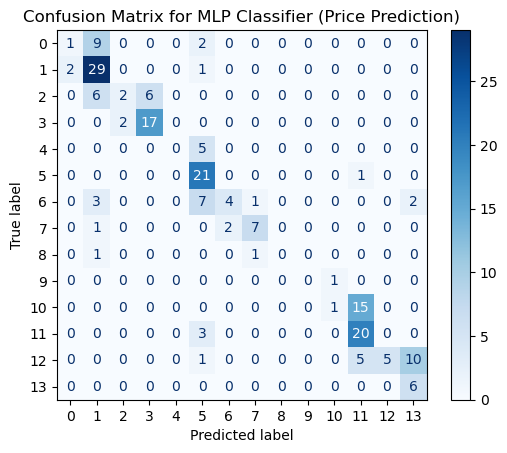

[ 4 38  2  2 38 38  3 14  2 38  2  4 40 14 14  2 38 14  4 38  4  4  1  4
  2 14  4 16  4 39 14 40 14 38 38  4 37  2 39 14 38  2 15 38 40 14 40 14
  2 14 14 38  2  4 38 40 38 38  2 38 15 38 38  4  2 38 40 38 38 14 38 39
 15 38 14 40 16  2 14  2  2 40  4  2  4  2  2 16 14 38 14 39 40  2  2  4
 40  2 14  2 14  2 16 14  4  2 14  2  2  4  4 38 14 40 38 38 14  4  2 38
 38  1  4 38  3  2 14 16 14  2 14 14  2 38 38  2 14  4 38  2 38 38 14 40
  2 14 38  2 40  2  2 14  2  2 14 14  2  2 14 14 39 40  2  2 38 15  3 14
 38 16  2  1 16 40  2 38  4 14  3 40 14 15 38 14  4  2  2 37 38  2 40  2
 15 14 38 16  2  4 40 16]


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

df = pd.read_csv("../base/Processed_laptop.csv")

X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# print(X_test_scaled)

hiddenLayers = (64, 32)
learningRate = 0.002
maxIter = 1000
randomState = 42

model = MLPRegressor(
    hidden_layer_sizes=hiddenLayers, 
    activation='relu', 
    solver='adam', 
    max_iter=maxIter, 
    random_state=randomState, 
    learning_rate_init=learningRate
)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)  # Среднеквадратичная ошибка
mae = mean_absolute_error(y_test, y_pred)  # Средняя абсолютная ошибка
mape = mean_absolute_percentage_error(y_test, y_pred) # Средняя абсолютная процентная ошибка
r2 = r2_score(y_test, y_pred)  # Коэффициент детерминации R²

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R² Score: {r2}\n\n")

# for i, lable in enumerate(y_test):
#     if y_pred[i] -  lable != 0:
        # print(i, y_pred[i] -  lable)


# матрица ошибок
mlp = MLPClassifier(
    hidden_layer_sizes=hiddenLayers, 
    max_iter=maxIter, 
    random_state=randomState, 
    learning_rate_init=learningRate
)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix for MLP Classifier (Price Prediction)")
plt.show()
print(y_pred)


## Собственная реализация

In [68]:
import numpy as np

class MLPRegressor:
    def __init__(self, hidden_layer_sizes=(100,), activation='relu', 
                 learning_rate=0.001, max_iter=200, random_state=42):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.activation = activation
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.weights = []
        self.biases = []
        
    def _initialize_weights(self, n_features, n_outputs):
        np.random.seed(self.random_state)
        layer_sizes = [n_features] + list(self.hidden_layer_sizes) + [n_outputs]
        
        for i in range(len(layer_sizes)-1):
            limit = np.sqrt(6 / (layer_sizes[i] + layer_sizes[i+1]))
            self.weights.append(np.random.uniform(-limit, limit, 
                                               (layer_sizes[i], layer_sizes[i+1])))
            self.biases.append(np.zeros(layer_sizes[i+1]))
    
    def _activation(self, x):
        if self.activation == 'relu':
            return np.maximum(0, x)
        return x
    
    def _activation_derivative(self, x):
        if self.activation == 'relu':
            return (x > 0).astype(float)
        return np.ones_like(x)
    
    def _forward_pass(self, X):
        activations = [X]
        zs = []
        
        for w, b in zip(self.weights, self.biases):
            z = np.dot(activations[-1], w) + b
            a = self._activation(z)
            zs.append(z)
            activations.append(a)
            
        return activations, zs
    
    def _backprop(self, X, y, activations, zs):
        gradients_w = [np.zeros_like(w) for w in self.weights]
        gradients_b = [np.zeros_like(b) for b in self.biases]
        
        delta = (activations[-1] - y) * self._activation_derivative(zs[-1])
        gradients_b[-1] = np.mean(delta, axis=0)
        gradients_w[-1] = np.dot(activations[-2].T, delta) / len(X)
        
        for l in range(len(self.weights)-2, -1, -1):
            delta = np.dot(delta, self.weights[l+1].T) * self._activation_derivative(zs[l])
            gradients_b[l] = np.mean(delta, axis=0)
            gradients_w[l] = np.dot(activations[l].T, delta) / len(X)
            
        return gradients_w, gradients_b
    
    def fit(self, X, y):
        n_samples = X.shape[0]
        n_features = X.shape[1] if len(X.shape) > 1 else 1
        n_outputs = y.shape[1] if len(y.shape) > 1 else 1
        
        X = np.array(X).reshape(n_samples, n_features)
        y = np.array(y).reshape(n_samples, n_outputs)
        
        self._initialize_weights(n_features, n_outputs)
        
        for _ in range(self.max_iter):
            activations, zs = self._forward_pass(X)
            gradients_w, gradients_b = self._backprop(X, y, activations, zs)
            
            for i in range(len(self.weights)):
                self.weights[i] -= self.learning_rate * gradients_w[i]
                self.biases[i] -= self.learning_rate * gradients_b[i]
    
    def predict(self, X):
        X = np.array(X)
        if len(X.shape) == 1:
            X = X.reshape(1, -1)
        activations, _ = self._forward_pass(X)
        return activations[-1].squeeze()

df = pd.read_csv("../base/Processed_laptop.csv")

mlp = MLPRegressor(
    hidden_layer_sizes=hiddenLayers, 
    activation='relu', 
    learning_rate=learningRate, 
    max_iter=maxIter,
    random_state=randomState
)

mlp.fit(X_train_scaled, y_train)


y_pred = mlp.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)  # Среднеквадратичная ошибка
mae = mean_absolute_error(y_test, y_pred)  # Средняя абсолютная ошибка
mape = mean_absolute_percentage_error(y_test, y_pred) # Средняя абсолютная процентная ошибка
r2 = r2_score(y_test, y_pred)  # Коэффициент детерминации R²

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R² Score: {r2}\n\n")

# for i, lable in enumerate(y_test):
#     if y_pred[i] -  lable != 0:
        # print(i, y_pred[i] -  lable)

Mean Squared Error (MSE): 0.40123705146603955
Mean Absolute Error (MAE): 0.5085729418025916
Mean Absolute Percentage Error (MAPE): 0.13661133193373
R² Score: 0.9982804748465377


